# Import the necessary packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

## Import the dataset from scikit-learn

In [2]:
from sklearn import datasets
diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

## Residual Plot

In [4]:
def model_estimation(model, y_train, y_test, y_train_pred, y_test_pred):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_test_pred)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_test_pred) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_test_pred) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')
    
    
    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()

## Shape of the independent features

In [5]:
diabetes_X.shape

(442, 10)

## Independent feature (dis_prog)

In [6]:
diabetes_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## shape of the independent variable

In [7]:
diabetes_y.shape

(442,)

## Discription of the dataset

## Creating one single dataframe for the entire dataset consisting the independent and dependent variables

In [8]:
diabetes = pd.DataFrame(diabetes_X,columns = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])
diabetes["dis_prog"] = pd.DataFrame(diabetes_y)

In [9]:
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## Five summary statistics

In [10]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## Info of the data

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  dis_prog  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Checking for na Values 

In [12]:
diabetes.isna().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
dis_prog    0
dtype: int64

## Checking for null values

In [13]:
diabetes.isnull().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
dis_prog    0
dtype: int64

## Correlation Matrix

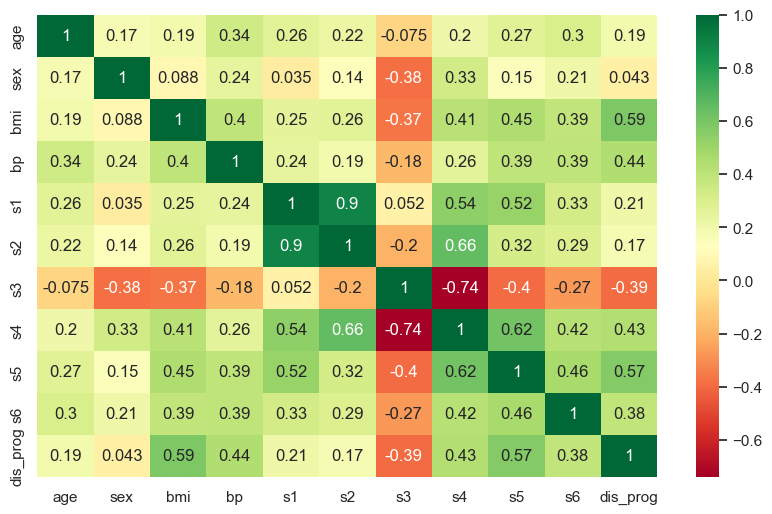

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
corrmat = diabetes.corr()
top_corr_features = corrmat.index
plt.rcParams['figure.figsize'] = [10,6]
sns.heatmap(diabetes[top_corr_features].corr(),annot = True,cmap = 'RdYlGn')
plt.show()

## Pearsons Correlation

In [15]:
pd.DataFrame(diabetes[["dis_prog","age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"]].corr()["dis_prog"])

,dis_prog
dis_prog,1.000000
age,0.187889
sex,0.043062
bmi,0.586450
bp,0.441484
s1,0.212022
s2,0.174054
s3,-0.394789
s4,0.430453
s5,0.565883


In [16]:
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Splitting the data into Independent variable (X) and dependent variable (y)

In [17]:
X = pd.DataFrame(diabetes.iloc[:,:-1])
y = diabetes.iloc[:,-1]

## Distribution plot of dependent variable dis_prog

<AxesSubplot:xlabel='dis_prog', ylabel='Density'>

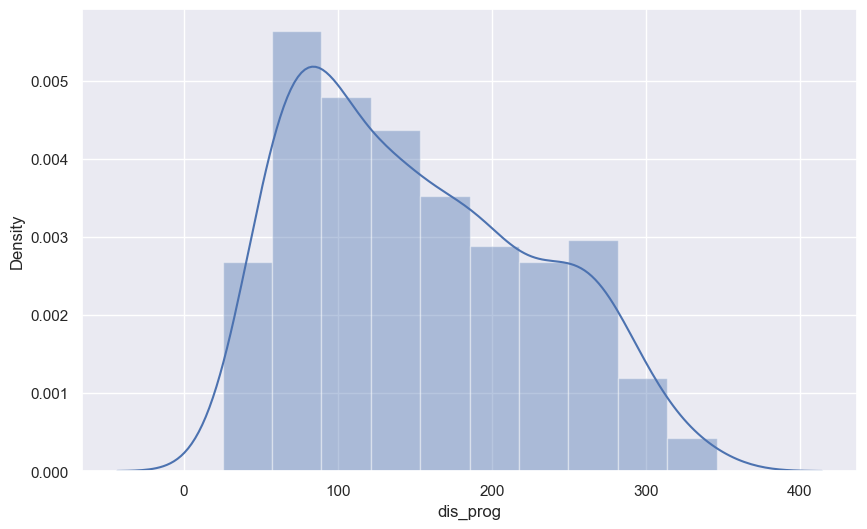

In [18]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(diabetes["dis_prog"])

In [19]:
diabetes.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'dis_prog'],
      dtype='object')

## Distribution plot of age

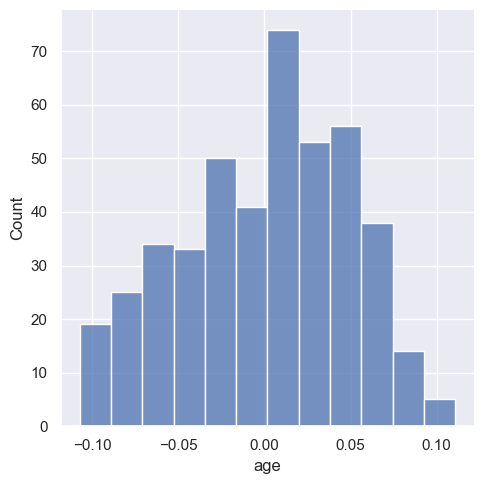

In [20]:
sns.displot(data=diabetes,x = "age",palette="winter")

## Splitting the data into train and test 

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## shape of train and test data

In [22]:
print(f" the shape of X_train data is {X_train.shape}")
print(f" the shape of y_train data is {X_test.shape}")
print(f" the shape of y_train data is {y_train.shape}")
print(f" the shape of y_test is {y_test.shape}")

 the shape of X_train data is (353, 10)
 the shape of y_train data is (89, 10)
 the shape of y_train data is (353,)
 the shape of y_test is (89,)


## Fitting the multivariate linear regression

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Number of parameters in Linear Regression Model

In [26]:
print(f'Number of parameters: {model.coef_.shape[0]}')

Number of parameters: 10


## Making predictions

In [27]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

## Training and test loss for linear regression

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
train_loss = mean_squared_error(y_train,y_train_pred)
test_loss = mean_squared_error(y_test,y_test_pred)

In [29]:
train_loss

3052.9864428642527

In [30]:
test_loss

2132.9779643676575

## Metrics for evaluation

### Evaluating Multivariate Linear Regression

Calculating R squared, Mean absolute error and mean absolute percentage error for train set

In [31]:
print("Check for Regression metrics on the train set")
print(f"R2 Score:{r2_score(y_train,y_train_pred)}")
print(f"MAE:{mean_absolute_error(y_train,y_train_pred)}")
print(f"MSE:{mean_squared_error(y_train,y_train_pred)}")
print(f"MAPE:{mean_absolute_percentage_error(y_train,y_train_pred)}")

Check for Regression metrics on the train set
R2 Score:0.5063312804096729
MAE:44.90160359928513
MSE:3052.9864428642527
MAPE:0.4088527864764324


 Calculating R squared, Mean absolute error and mean absolute percentage error for test set

In [32]:
print("Check for Regression metrics on the test set")
print(f"R2 Score:{r2_score(y_test,y_test_pred)}")
print(f"MAE:{mean_absolute_error(y_test,y_test_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_test_pred)}")
print(f"MAPE:{mean_absolute_percentage_error(y_test,y_test_pred)}")

Check for Regression metrics on the test set
R2 Score:0.5665407014392163
MAE:36.89055370715038
MSE:2132.9779643676575
MAPE:0.3322131432500829


# Performing Ploynomial Regression

In [33]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)
model1 = LinearRegression()
model1.fit(X_train_poly, y_train)

LinearRegression()

## Parameters for polynomial regression

In [34]:
polynomial_features.get_feature_names_out()

array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'age^2', 'age sex', 'age bmi', 'age bp', 'age s1', 'age s2',
       'age s3', 'age s4', 'age s5', 'age s6', 'sex^2', 'sex bmi',
       'sex bp', 'sex s1', 'sex s2', 'sex s3', 'sex s4', 'sex s5',
       'sex s6', 'bmi^2', 'bmi bp', 'bmi s1', 'bmi s2', 'bmi s3',
       'bmi s4', 'bmi s5', 'bmi s6', 'bp^2', 'bp s1', 'bp s2', 'bp s3',
       'bp s4', 'bp s5', 'bp s6', 's1^2', 's1 s2', 's1 s3', 's1 s4',
       's1 s5', 's1 s6', 's2^2', 's2 s3', 's2 s4', 's2 s5', 's2 s6',
       's3^2', 's3 s4', 's3 s5', 's3 s6', 's4^2', 's4 s5', 's4 s6',
       's5^2', 's5 s6', 's6^2'], dtype=object)

## Making Predictions 

In [35]:
y_test_poly_pred = model1.predict(X_test_poly)
y_train_poly_pred = model1.predict(X_train_poly)

In [36]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
poly_train_loss = mean_squared_error(y_train,y_train_poly_pred)
poly_test_loss = mean_squared_error(y_test,y_test_poly_pred)

In [37]:
poly_train_loss

2482.5159547600456

In [38]:
poly_test_loss

2769.310577179017

## Metrics for evaluation 

### Evaluating Polynomial Regression

Calculating R squared, Mean absolute error and mean absolute percentage error for train set for polynomial regression

In [39]:
print("Check for Regression metrics on the train set")
print(f"R2 Score:{r2_score(y_train,y_train_poly_pred)}")
print(f"MAE:{mean_absolute_error(y_train,y_train_poly_pred)}")
print(f"MSE:{mean_squared_error(y_train,y_train_poly_pred)}")
print(f"MAPE:{mean_absolute_percentage_error(y_train,y_train_poly_pred)}")

Check for Regression metrics on the train set
R2 Score:0.5985765100223728
MAE:39.65778038337695
MSE:2482.5159547600456
MAPE:0.3617233897696764


Calculating R squared, Mean absolute error and mean absolute percentage error for test set in polynomial regression model

In [40]:
print("Check for Regression metrics on the test set")
print(f"R2 Score:{r2_score(y_test,y_test_poly_pred)}")
print(f"MAE:{mean_absolute_error(y_test,y_test_poly_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_test_poly_pred)}")
print(f"MAPE:{mean_absolute_percentage_error(y_test,y_test_poly_pred)}")

Check for Regression metrics on the test set
R2 Score:0.4372265253866131
MAE:42.0960513484214
MSE:2769.310577179017
MAPE:0.36274086751878576


## Residual plots

y = 48.80 * x_0 + -307.91 * x_1 + 442.30 * x_2 + 345.96 * x_3 + -13730.73 * x_4 + 11905.67 * x_5 + 4910.75 * x_6 + 70.72 * x_7 + 5197.99 * x_8 + 78.92 * x_9 + 937.94 * x_10 + 4408.96 * x_11 + -1584.73 * x_12 + 829.01 * x_13 + -3228.36 * x_14 + -849.17 * x_15 + 4086.54 * x_16 + 1687.98 * x_17 + 4079.48 * x_18 + 995.87 * x_19 + -1.86 * x_20 + 858.14 * x_21 + 2408.52 * x_22 + -8802.33 * x_23 + 9614.74 * x_24 + 3021.86 * x_25 + -3318.56 * x_26 + 3293.51 * x_27 + -1018.65 * x_28 + 1653.93 * x_29 + 3305.63 * x_30 + -20016.09 * x_31 + 17727.69 * x_32 + 6666.42 * x_33 + -1808.92 * x_34 + 5135.33 * x_35 + 1404.75 * x_36 + -1038.84 * x_37 + 19907.91 * x_38 + -16951.54 * x_39 + -6506.42 * x_40 + 1262.22 * x_41 + -7377.93 * x_42 + -1895.56 * x_43 + 68475.88 * x_44 + -101465.52 * x_45 + -63462.93 * x_46 + -19102.10 * x_47 + -39059.75 * x_48 + 3397.55 * x_49 + 41989.02 * x_50 + 43960.24 * x_51 + 3213.44 * x_52 + 32293.98 * x_53 + -7119.63 * x_54 + 13806.51 * x_55 + 8932.46 * x_56 + 18008.89 * x_57 +

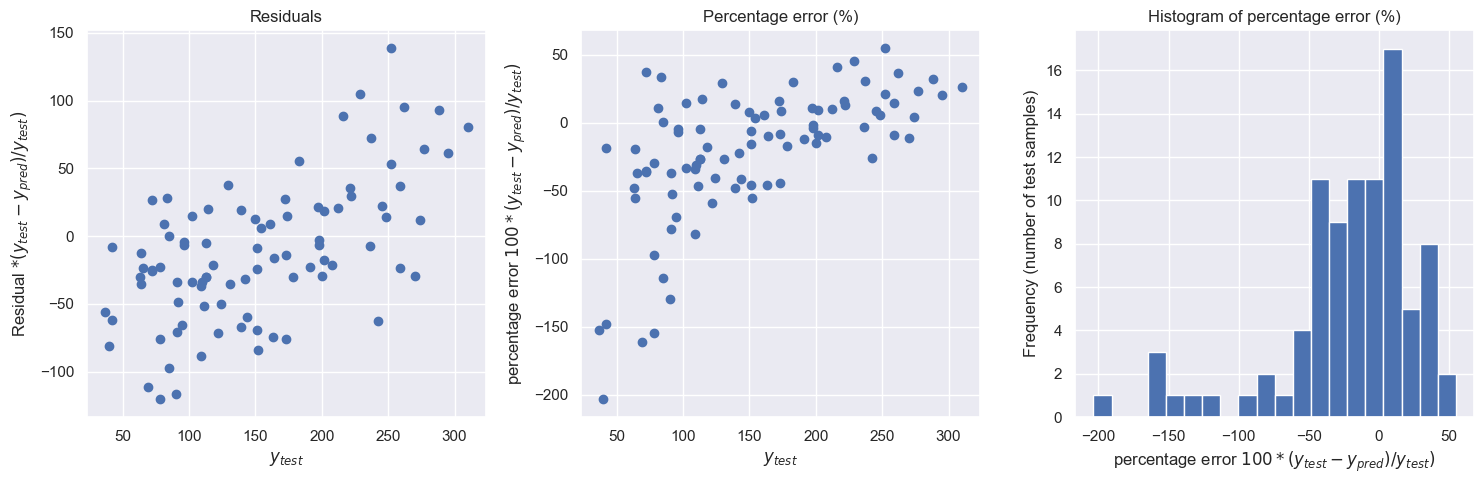

In [41]:
model_estimation(model1, y_train, y_test, y_train_poly_pred, y_test_poly_pred)

y = 0.71 * x_0 + -271.60 * x_1 + 538.24 * x_2 + 321.38 * x_3 + -820.73 * x_4 + 492.64 * x_5 + 104.65 * x_6 + 157.69 * x_7 + 753.12 * x_8 + 90.42 * x_9 + 153.98


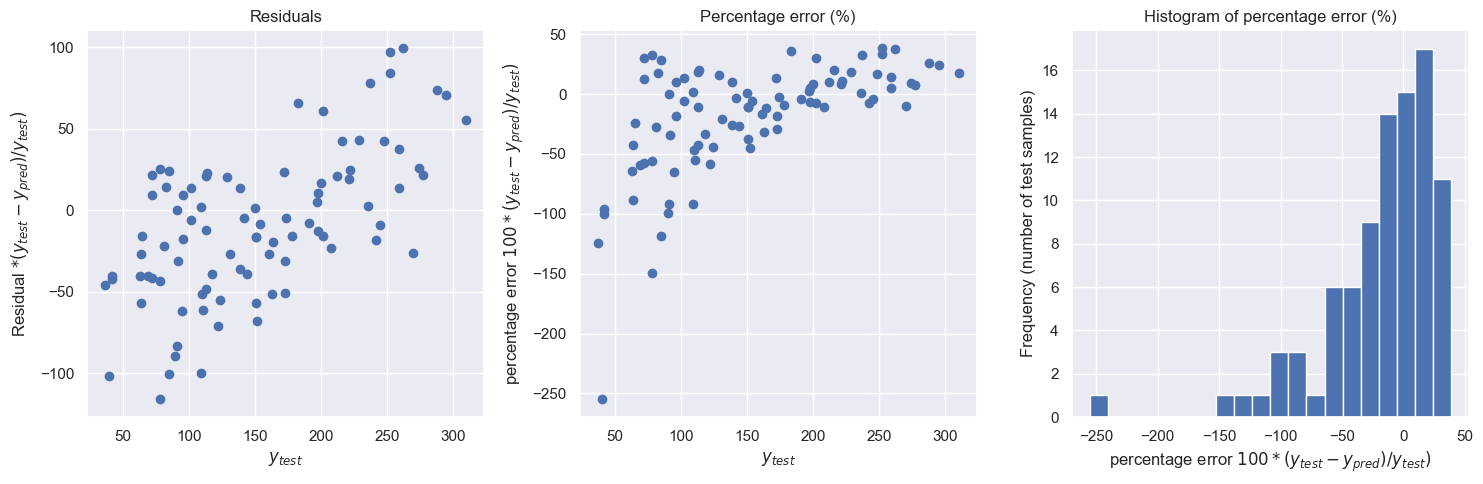

In [42]:
model_estimation(model, y_train, y_test, y_train_pred, y_test_pred)

### What insights regarding the goodness-of-fit can you draw from the graphs provided by the function below, for each of the models?

In he residual plot of the linear regression model, the y_test (actual) values that are low (approximately lesser than 200) are
concentrated below the regression line and values that are comparitevly higher lie above the regression line. 
there are more residuals that point in the direction of the negative percentage error axis.


the percentage error is used to interpret the visualize the deviations between the predicted values and the actual values in terms of percentages.
a good performing model would have percentage errors close to zero. For the Multivariate linear regression we can see that the percentage error plot 
acquires more number of positive points as compared to the Multivariate polynomial regression model. In addition to that,
Multivariate linear regression has more points close to the regression line suggests better prediction capability
    
The histogram of Multivariate linear regression the residuals are normally distributed around zero with a few which are skewed negatively.
On the other hand the histogram of the Multivariate Polynomial Regression are symmetrically distribted and with a few residual 
points skewed towards the left but the
histogram of the linear regression model suggest a better fit as more number of residuals are normally distributed around 0. 
And most of the error point lie between -50 to 50.

###  How many parameters are we fitting for in linear regression and in the polynomial regression? Explain these values.

The number of parameters being used in linear regression will be equal to the number of independent features (estimators) in the 
So the number of parameters will be 10 for the Multivariate Linear Regression.

When it comes to the Multivariate Ploynomial regression we have used degree = 2 (i.e Quadratic). 
Degree of polynomial and the number of independent features are essential to deteremube the number of parameters fitted in 
polynomial regression. Each polynomial term will be a combination of Number of parameters in the polynomial regression with degree =2 so there are 65 features in polynomial regression. Moreover, as bias is not included we have not included the intercept term.

###  Compare the two models by looking at MAE and MAPE using the provided function
### Which model would you choose for deployment, and why?

When it comes to model comparison with respect to MAE and MAPE

Though there is no significant differences in the metrics of both the model, I would choose Multivariate Linear Regression
because it is clearly seen that it has lesser MAPE and MAE. Moreover, when it comes to predicting the unseen data Linear Regression is comparitively better than the Multivariate Polynomial Regression.

In addition to that, as multivariate polynomial regression has higher complexity as it has too many independent featues because of it degree being 2, which does not always positively contribute towards building a good fit.

Moreover, From the above results it obsevable that Multivariate Polynomial Regression has comparitively higher MSE
that the Multivarite Linear Regression. 

Hence, I would choose Multivariate Linear Regression Model

###  Further Comparisons

There is one more significant comparision we can consider while choosing the best model out of the above models;
        
From the above given results it is clearly interpretable that the Multivariate Linear Regression Model fits comparitively well on both the train and test data as the model accuracuy
 is 50% for the train data (seen data) and 56% on the test data (Unseen Data)

On the other hand, Polynomial Multivariate Regression fits comparitively well on train data but it is capability to predict unseen data is significantly lesser.